In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('data/cuisines.csv')

<Axes: ylabel='cuisine'>

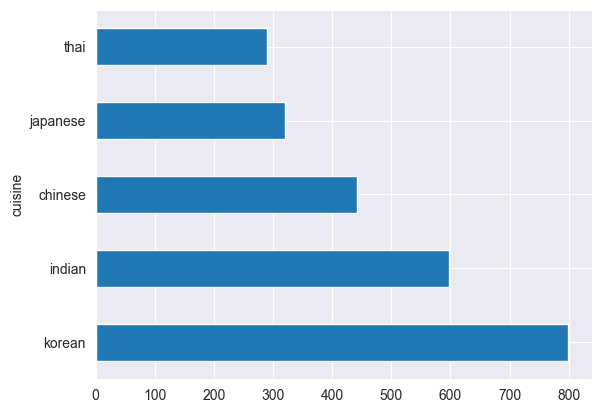

In [3]:
df.cuisine.value_counts().plot.barh()


In [4]:
df.columns

Index(['Unnamed: 0', 'cuisine', 'almond', 'angelica', 'anise', 'anise_seed',
       'apple', 'apple_brandy', 'apricot', 'armagnac',
       ...
       'whiskey', 'white_bread', 'white_wine', 'whole_grain_wheat_flour',
       'wine', 'wood', 'yam', 'yeast', 'yogurt', 'zucchini'],
      dtype='object', length=385)

In [5]:
def create_ingredient_df(df):
    ingredient_df = df.T.drop(['cuisine', 'Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False,
                                              inplace=False)
    return ingredient_df

In [6]:
thai_df = df[(df['cuisine'] == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

In [7]:
thai_df

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
274,2333,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,2334,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276,2335,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277,2336,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278,2337,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,55615,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2359,55616,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2360,55617,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2361,55618,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

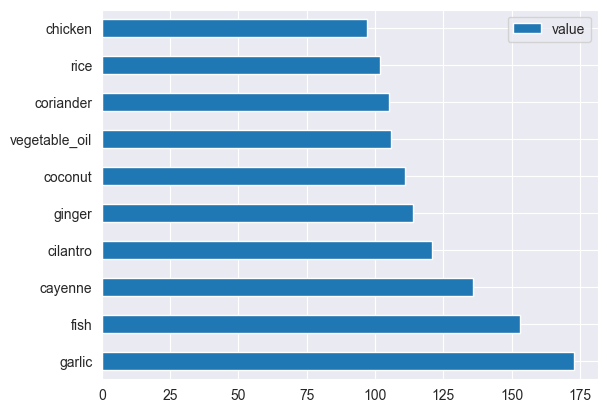

In [8]:
thai_ingredient_df = create_ingredient_df(thai_df)
thai_ingredient_df.head(10).plot.barh()

In [9]:
thai_ingredient_df

,value
garlic,173
fish,153
cayenne,136
cilantro,121
ginger,114
...,...
ham,1
kale,1
buckwheat,1
roasted_beef,1


<Axes: >

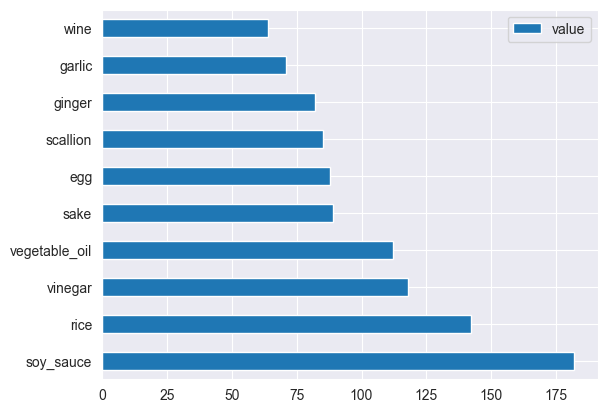

In [10]:
japanese_ingredient_df = create_ingredient_df(japanese_df)
japanese_ingredient_df.head(10).plot.barh()

<Axes: >

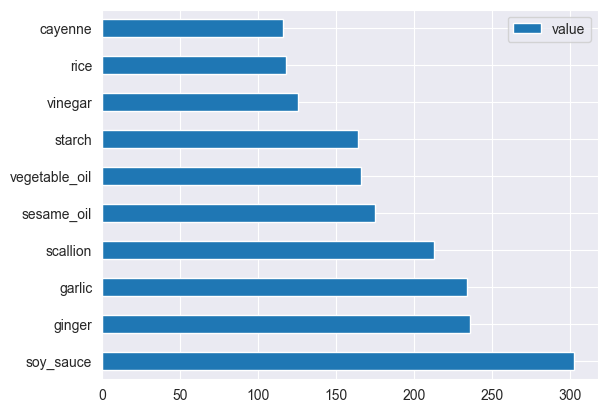

In [11]:
chinese_ingredient_df = create_ingredient_df(chinese_df)
chinese_ingredient_df.head(10).plot.barh()

<Axes: >

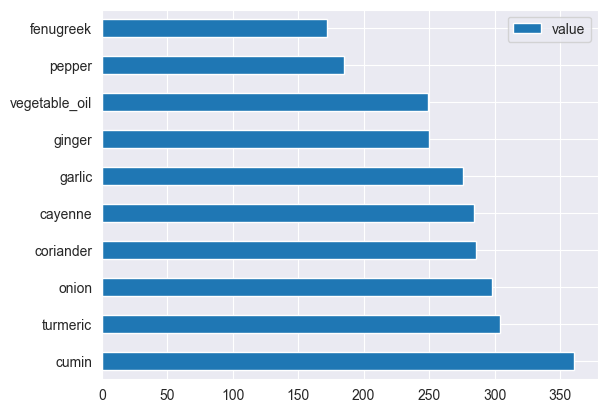

In [12]:
indian_ingredient_df = create_ingredient_df(indian_df)
indian_ingredient_df.head(10).plot.barh()

<Axes: >

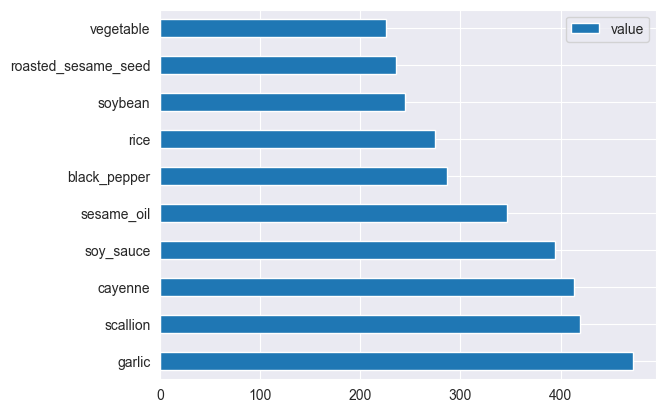

In [13]:
korean_ingredient_df = create_ingredient_df(korean_df)
korean_ingredient_df.head(10).plot.barh()

In [15]:
feature_df = df.drop(['cuisine', 'Unnamed: 0', 'rice', 'garlic', 'ginger'], axis=1)
labels_df = df.cuisine  #.unique()
labels_df.head()

0    indian
1    indian
2    indian
3    indian
4    indian
Name: cuisine, dtype: object

In [16]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

In [17]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.cuisine.value_counts()}')

new label count: cuisine
indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: count, dtype: int64
old label count: cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64


In [18]:
transformed_df = pd.concat([transformed_label_df, transformed_feature_df], axis=1, join='outer')

In [19]:
transformed_df.head()
transformed_df.info()
transformed_df.to_csv("data/cleaned_cuisines.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 381 entries, cuisine to zucchini
dtypes: int64(380), object(1)
memory usage: 11.6+ MB


In [20]:
import pandas as pd

cuisines_df = pd.read_csv("data/cleaned_cuisines.csv")
cuisines_df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
from sklearn.model_selection import train_test_split

cuisines_label_df = cuisines_df['cuisine']

cuisines_feature_df = cuisines_df.drop(['Unnamed: 0', 'cuisine'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)


In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr', solver='liblinear')
model = lr.fit(X_train, np.ravel(y_train))

accuracy = model.score(X_test, y_test)
print("Accuracy is {}".format(accuracy))

Accuracy is 0.8215179316096747


In [24]:
print(f'ingredients: {X_test.iloc[50][X_test.iloc[50] != 0].keys()}')
print(f'cuisine: {y_test.iloc[50]}')

ingredients: Index(['bell_pepper', 'coriander', 'cumin', 'fenugreek', 'onion', 'turmeric'], dtype='object')
cuisine: indian


In [25]:
test = X_test.iloc[50].values.reshape(-1, 1).T
proba = model.predict_proba(test)
classes = model.classes_
resultdf = pd.DataFrame(data=proba, columns=classes)

topPrediction = resultdf.T.sort_values(by=[0], ascending=[False])
topPrediction.head()

D:\Work\NeuralX\code\practical_ml\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,0
indian,0.807525
thai,0.140337
japanese,0.048499
chinese,0.002345
korean,0.001293


In [26]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     chinese       0.74      0.76      0.75       225
      indian       0.91      0.89      0.90       247
    japanese       0.80      0.80      0.80       252
      korean       0.86      0.78      0.82       234
        thai       0.80      0.88      0.84       241

    accuracy                           0.82      1199
   macro avg       0.82      0.82      0.82      1199
weighted avg       0.82      0.82      0.82      1199


# support vector classifier 


In [27]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, \
    precision_recall_curve
import numpy as np

In [28]:
X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)


In [33]:
C = 12
# Create different classifiers.
classifiers = {
    'Linear SVC': SVC(kernel='linear', C=C, probability=True, random_state=3),
    'KNN classifier': KNeighborsClassifier(C),
    'SVC': SVC(),
    'RFST': RandomForestClassifier(n_estimators=150),
    'ADA': AdaBoostClassifier(n_estimators=150)
}

In [34]:
n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train, np.ravel(y_train))

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred))

Accuracy (train) for Linear SVC: 77.6% 
              precision    recall  f1-score   support

     chinese       0.74      0.69      0.72       255
      indian       0.85      0.89      0.87       225
    japanese       0.79      0.73      0.76       252
      korean       0.82      0.75      0.78       236
        thai       0.70      0.83      0.76       231

    accuracy                           0.78      1199
   macro avg       0.78      0.78      0.78      1199
weighted avg       0.78      0.78      0.78      1199

Accuracy (train) for KNN classifier: 71.1% 
              precision    recall  f1-score   support

     chinese       0.71      0.65      0.68       255
      indian       0.76      0.84      0.80       225
    japanese       0.66      0.77      0.71       252
      korean       0.92      0.55      0.69       236
        thai       0.62      0.75      0.68       231

    accuracy                           0.71      1199
   macro avg       0.73      0.71      0.71    

D:\Work\NeuralX\code\practical_ml\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy (train) for ADA: 67.6% 
              precision    recall  f1-score   support

     chinese       0.66      0.47      0.55       255
      indian       0.82      0.88      0.85       225
    japanese       0.62      0.57      0.59       252
      korean       0.69      0.73      0.71       236
        thai       0.60      0.76      0.67       231

    accuracy                           0.68      1199
   macro avg       0.68      0.68      0.67      1199
weighted avg       0.68      0.68      0.67      1199
